# Mini-Project 2 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Sara Hamed Mohamed Ali

ID: 43-4191

Tutorial: BI T1

---

Name: Shams El Din El Khaitb

ID: 43-14660

Tutorial: BI T1

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

# Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')
pd.set_option('display.max_rows',2973)

Viewing The Data:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


# Data Inspection & Cleaning

Not much cleaning was needed for the dataset. We only changed the value of duration_ms to be int, so that we can judge its numbers.

In [ ]:
df.isna().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [ ]:
df['duration_ms'] = df['duration_ms'].astype(int)
df.head(10)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,160297,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1048887,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,115177,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,232880,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,190628,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,343196,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
6,1,abstract beats,0.342147,0.623000,229936,0.527800,0.333603,0.099653,-7.918000,0.116373,112.413800,0.493507,58.933333,10
7,1,abstract hip hop,0.243854,0.694571,231849,0.646235,0.024231,0.168543,-7.349328,0.214258,108.244987,0.571391,39.790702,2
8,0,accordeon,0.323000,0.588000,164000,0.392000,0.441000,0.079400,-14.899000,0.072700,109.131000,0.709000,39.000000,2
9,1,accordion,0.446125,0.624812,167061,0.373437,0.193738,0.160300,-14.487063,0.078538,112.872438,0.658688,21.937500,2


# Exploratory Data Analysis

Here we just visualize the data for our own interpretation, and answer the needed queries.

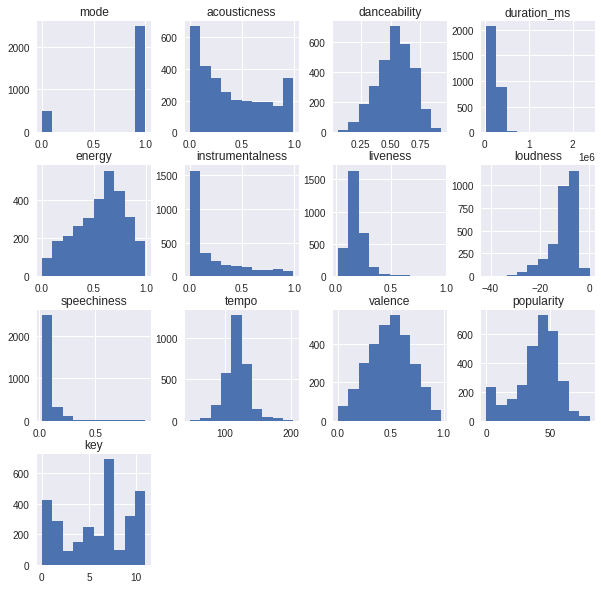

In [ ]:
df.hist(figsize=(10,10));

In [ ]:
#sns.pairplot(df, height=3.5);

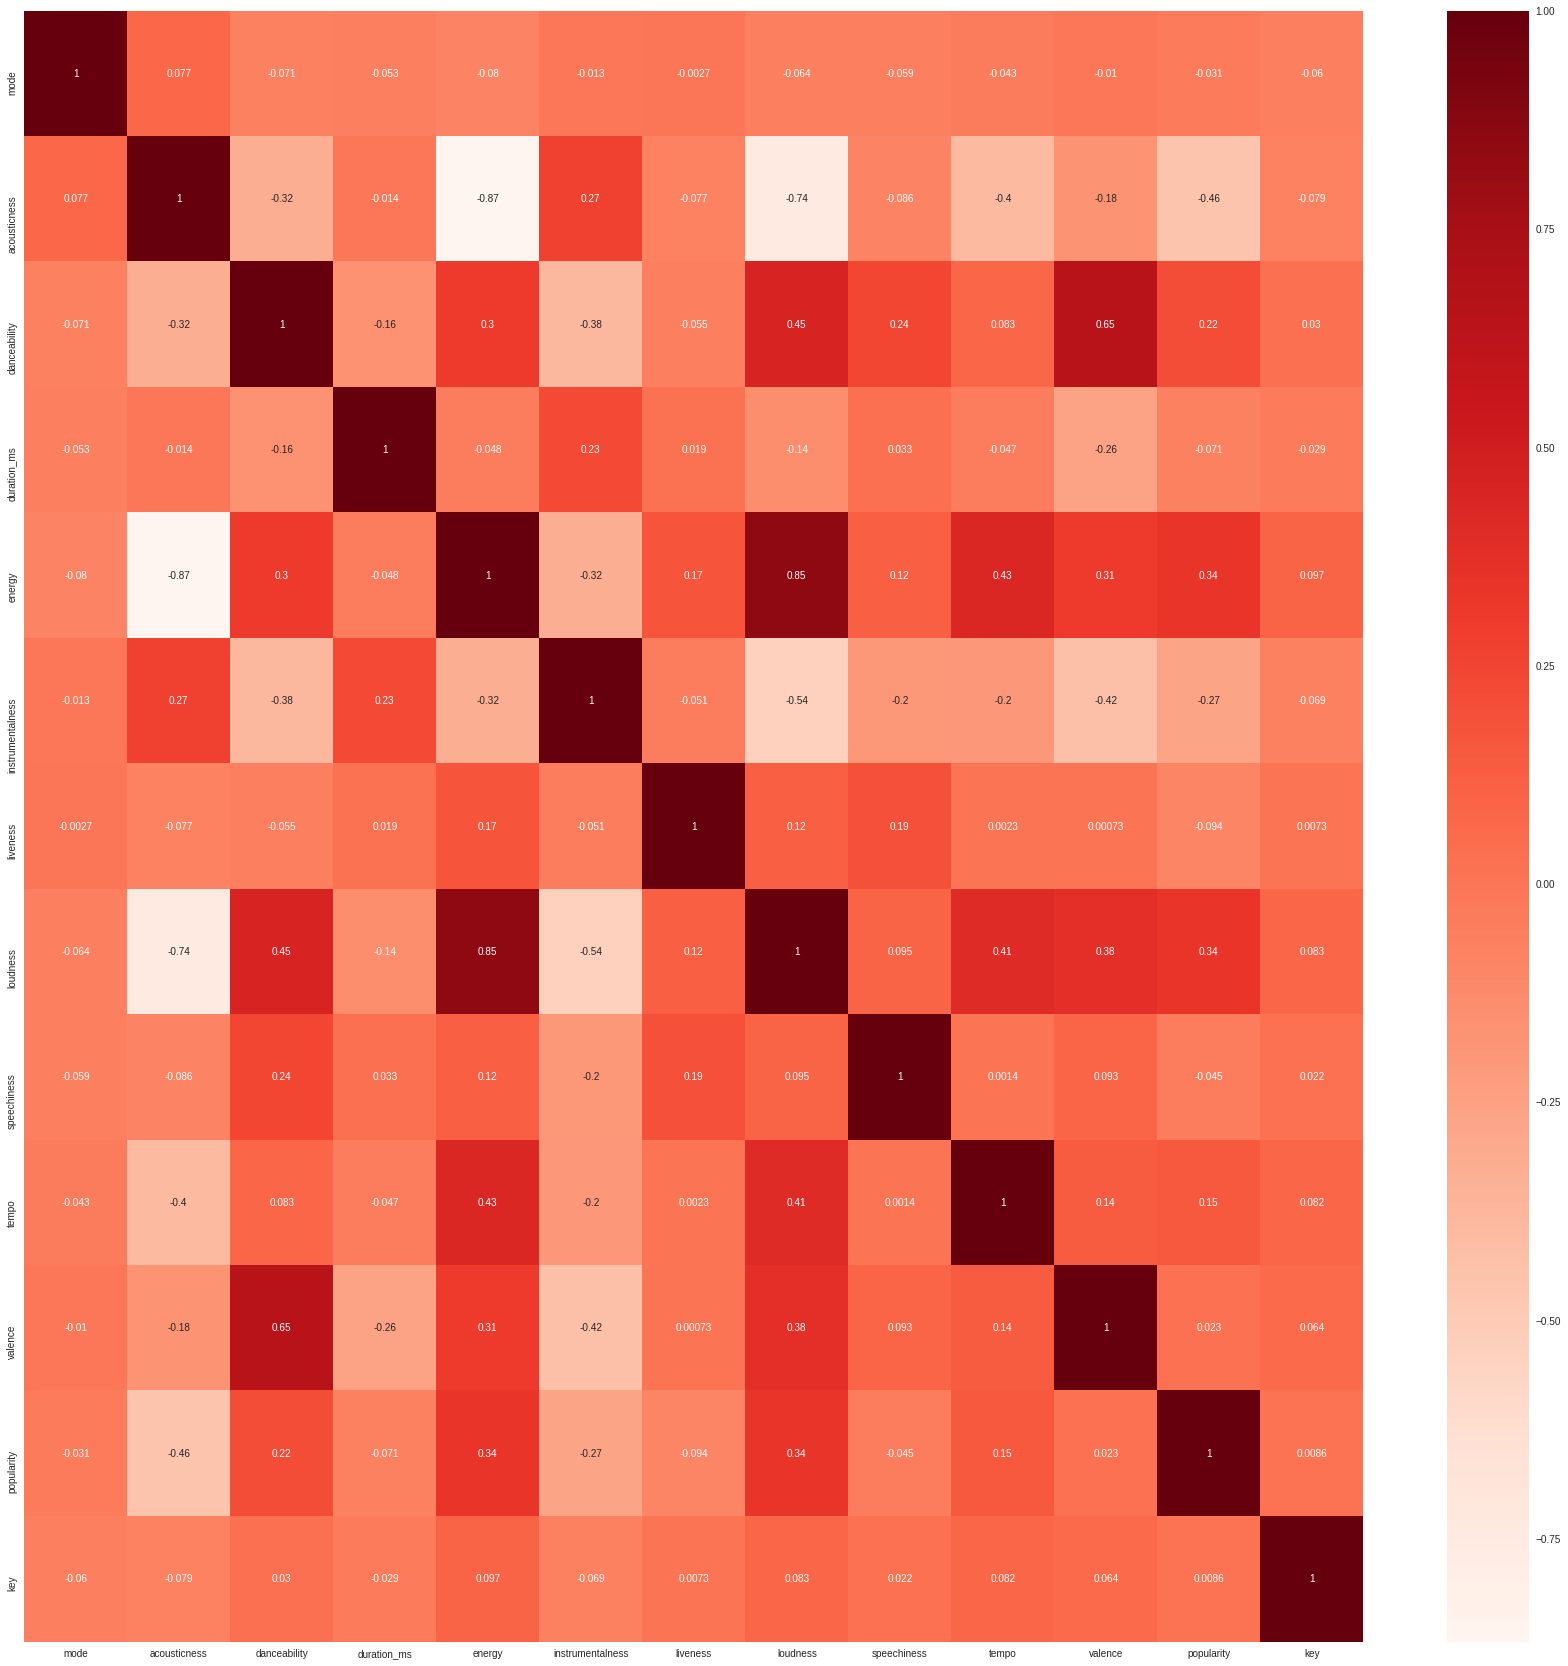

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='Reds' );

1. What are the 20 most danceable music genres?

In [ ]:
danceability_sorted = df.sort_values('danceability', ascending=False)
danceability_sorted[['genres']].head(20)

,genres
1012,experimental house
1238,guam indie
917,dutch hip hop
924,dutch rap pop
364,british children's music
1358,indie deutschrap
2743,trance mexicano
1072,footwork
1119,funk paulista
2244,proto-rap


2. What are the 20 lowest energy music genres?

In [ ]:
energy_sorted = df.sort_values('energy', ascending=True)
energy_sorted[['genres']].head(20)

,genres
328,brain waves
283,binaural
1611,korean classical piano
2476,singing bowl
1723,medieval
1441,italian classical guitar
1895,native american spiritual
473,caucasian classical piano
150,australian ambient
912,dutch classical piano


3. What are the 20 loudest music genres?

In [ ]:
loudness_sorted = df.sort_values('loudness', ascending=False)
loudness_sorted[['genres']].head(20)

,genres
1897,nederlandse hardstyle
18,action rock
1747,memphis indie
2107,palestinian pop
1777,middle east hip hop
105,arabic hip hop
1510,japanese metalcore
286,birmingham hip hop
1473,j-idol
1505,japanese indie rock


4. What are the 20 music genres most commonly performed live?

In [ ]:
liveness_sorted = df.sort_values('liveness', ascending=False)
liveness_sorted[['genres']].head(20)

,genres
1826,modular synth
1246,gujarati garba
2743,trance mexicano
1784,mindfulness
284,birdsong
1931,new comedy
797,deep comedy
185,autoharp
656,clean comedy
141,atmospheric sludge


5. What are the 20 most popular music genres?


In [ ]:
popularity_sorted = df.sort_values('popularity', ascending=False)
popularity_sorted[['genres']].head(20)

,genres
237,basshall
2778,turkish edm
2533,south african house
2755,trap venezolano
46,alberta hip hop
536,chinese electropop
37,afroswing
31,afro soul
2383,russian dance
1239,guaracha


# Clustering

The Feautures Selection involved choosing the columns: acousticness, danceability, energy, instrumentalness, and valence. These features were selected as they mostly include all the data atrributes needed to provide reasonable clusters. The selected attributes were put in a seperate copy data frame to cluster upon. Then, we assigned the cluster labels to another dataframe copy that included the features selected in order to print random samples later on.

The reason for choosing each feature is described below: 


*   The acousticness measures A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. Thus, using the acousticness measure could help us in determining the instruments used, and help split music of electronic nature.
*   Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. Thus, using danceability gives us a good measure for multiple attributes and allows us to exclude the tempo attribute that is explicitly present in the dataset.


*  Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. Thus, including energy can allow us to exclude the louadness attribute that is explicity present in the data set and provide us with a good measure of multiple attributes. 
*   Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. Thus, using this feauture elimantes the need for the speechability attribute, and provides us with a measure to distinguish between genres like rap and classical music.


*   	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). Using this feauture eliminates the need to use mode to judge the major or minor chord progressions that also judge whether a song is happy or sad. In addition, using mode was not encourage as it is a binary value that doesn't cluster that well with other attributes. Moreover, a song can be happy while having minor chords, or sad while having major chords and vice versa. So valence is an overall better measure to use to differeniate between genres.







In [ ]:
X = df[['acousticness', 'danceability','energy','instrumentalness','valence']].copy()
X.head()

,acousticness,danceability,energy,instrumentalness,valence
0,0.979333,0.162883,0.071317,0.606834,0.103783
1,0.494780,0.299333,0.450678,0.477762,0.221750
2,0.762000,0.712000,0.818000,0.876000,0.975000
3,0.651417,0.529093,0.419146,0.205309,0.513604
4,0.676557,0.538961,0.316434,0.003003,0.448249


In [ ]:
X1 = df[['genres','acousticness', 'danceability','energy','instrumentalness','valence']].copy()
X1.head()

,genres,acousticness,danceability,energy,instrumentalness,valence
0,21st century classical,0.979333,0.162883,0.071317,0.606834,0.103783
1,432hz,0.494780,0.299333,0.450678,0.477762,0.221750
2,8-bit,0.762000,0.712000,0.818000,0.876000,0.975000
3,[],0.651417,0.529093,0.419146,0.205309,0.513604
4,a cappella,0.676557,0.538961,0.316434,0.003003,0.448249


In [ ]:
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,160297,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1048887,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,115177,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,232880,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,190628,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


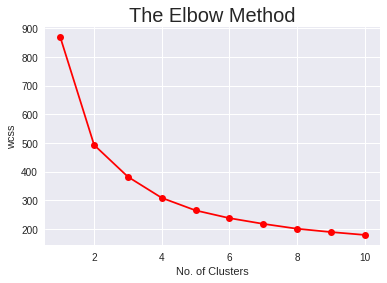

In [ ]:
from sklearn.cluster import KMeans

# We try out different number of clusters incrementally
# From 1 till 10
# 10 was chosen as the upper limit since there doesn't seem to be many clusters present in the data
# as per the pairplot
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)

# Get the cluster labels for the fitted data
labels = km.labels_
labels
X1["cluster"] = labels

In [ ]:
frame = pd.DataFrame(X)
frame['cluster']= km.fit_predict(X)
frame['cluster'].value_counts()

5    715
0    633
1    554
4    456
2    345
3    270
Name: cluster, dtype: int64

As can be seen above, we chose the number of clusters to be 6 as the elbow method revealed a good range within 4-6 clusters. We tried using a number of clusters outside of this range; however, using lower ranges did not cluster well and using higher ranges resulted clusters that were good, but a little homogenous and more difficult to interpret. 6 clusters seemed to be a sweet spot to cluster on as it provided reletively balanced clusters that were not too homogenous. and provided reasonable clustering of the genres.

# Cluster Interpretation

We printed a pair plot to judge the overall clustering and homogenity. In addition, we printed a countplot to judge the over distribution of the clusters. However, we used box plots to interpret the clusters as it proved to provide a better looking representation to use to interpret the clusters based on it. After interpreting the clusters we printed random samples from each cluster to verify the clustering of the genres.

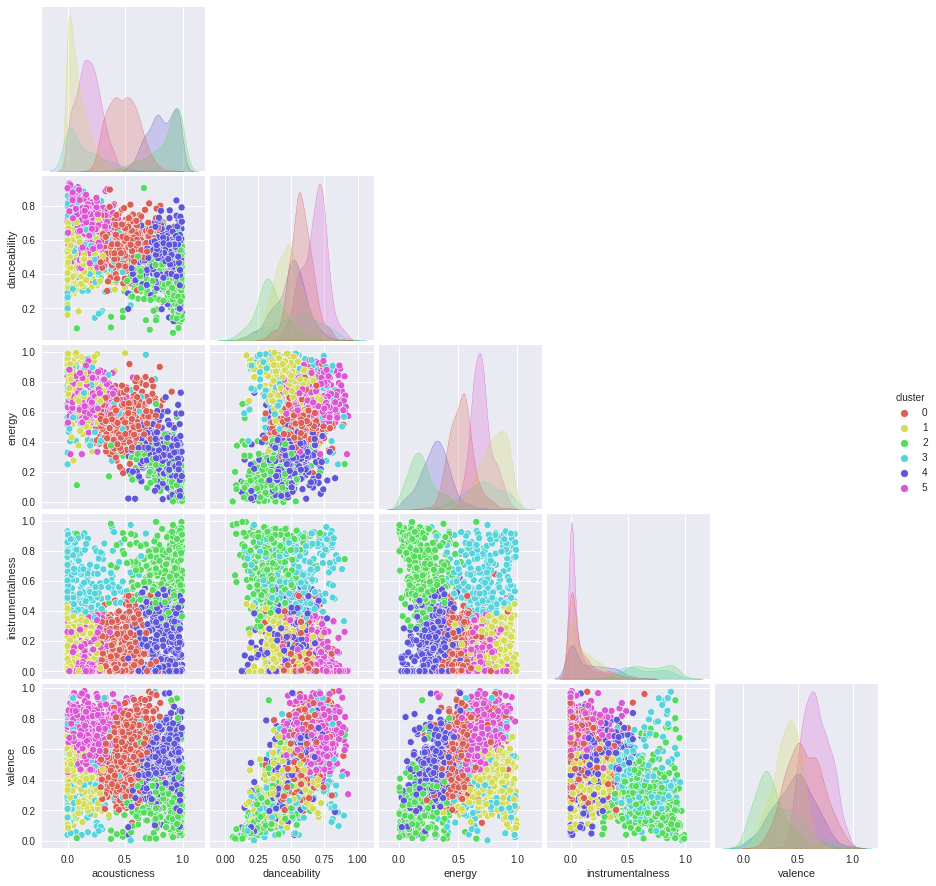

In [ ]:
sns.pairplot(X, hue='cluster', palette=sns.color_palette('hls',6), corner=True)

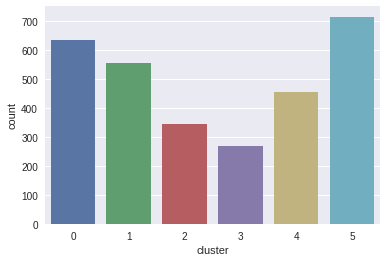

In [ ]:
sns.countplot(x='cluster', data=X)

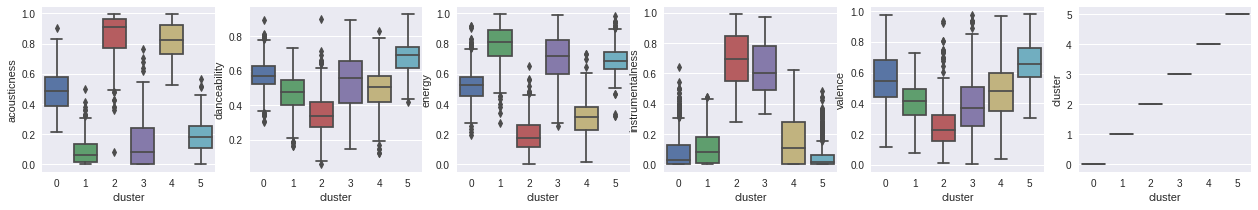

In [ ]:
# Alternative code with nicer-looking plots

# selects only the numerical columns
# and calculates how the plot grid should be divided into subplots (nxn)
cols = X.select_dtypes('number')
n = int(len(cols)**(1/2))

plt.figure(figsize=(200,200))
for i, col in enumerate(cols, 1):
    plt.subplot(n+1, n, i)
    sns.boxplot(x='cluster', y=col, data=X)

**Some Conclusions:**

*   Elements in Cluster #2 seem to have the highest range of acousticness, moderately low danceability, low energy, high instrumentalness, and low range of valence indicating that it might have genres that are classical or use instruments like the piano.
*   Elements in Cluster #1 exhibit a very low range of acousticness, medium danceability, high energy, low instrumentalness, and a medium range of valence
*   Elements in Cluster #0 have medium ranges of acousticness, danceability, energy, and valence; however, they exhibit a low range of instrumentalness.
*   Elements in Cluster #3 show exhibit the lowest range of acousticness, a medium to high range of danceability, a high range of energy, a medium to high range of instrumentalness, and low to medium range of valence indicating that it should include electronic sounds or music.
*   Elements in Cluster #4 exhibit a high range of acousticness, medium range of danceability, low to medium range of energy, low range of instrumentalness, and medium valence indicating a range of music that is slow paced with some vocals included; for example, low-fi.
*   Elements in Cluster #5 exhibit a low range of acousticness, a moderately high range of danceability, a moderately high range of energy, a very low range of instrumentalness, and medium to high range of valence indicating that it should include genres that use a lot of words; for example, rap.
*   Clusters #0, #1, and #5 seem to exhibit the lowest instrumentalness ranges, while Clusters #2, and #3 seem to have the highest range of instrumentalness.
*   Clusters #1, #3, and #5 seem to have the lowest acoustiness ranges, while Clusters #2 and #4 have the highest ranges of acousticness.








**Random Samples of Cluster Elements**


*   As can be seen below the corresponding printed samples show that the clustering of elements seems to be moderately accurate given the number of genres categories. It can be seen that the cluster elements correspond to the properties of the clusters seen in the boxplot above.



In [ ]:
c1=X1[X1['cluster']==0]
c2=X1[X1['cluster']==1]
c3=X1[X1['cluster']==2]
c4=X1[X1['cluster']==3]
c5=X1[X1['cluster']==4]
c6=X1[X1['cluster']==5]
# c7=X1[X1['cluster']==6]
# c8=X1[X1['cluster']==7]
# c9=X1[X1['cluster']==8]

print(c1.sample(20))
print(c2.sample(20))
print(c3.sample(20))
print(c4.sample(20))
print(c5.sample(20))
print(c6.sample(20))
# print(c7.sample(20))
# print(c8.sample(20))
# print(c9.sample(10))

                            genres  acousticness  ...   valence  cluster
1526                      jawaiian      0.363229  ...  0.705439        0
2753                     trap soul      0.289615  ...  0.445150        0
1067              folklore peruano      0.635500  ...  0.799500        0
1783               milwaukee indie      0.548423  ...  0.437875        0
1892  native american contemporary      0.382284  ...  0.693069        0
1563                  jig and reel      0.424433  ...  0.541438        0
980                           enka      0.565200  ...  0.409800        0
1396        instrumental bluegrass      0.541522  ...  0.620465        0
2955                         ye ye      0.578145  ...  0.470844        0
782                       dc indie      0.641000  ...  0.196000        0
1102                   french rock      0.351351  ...  0.636615        0
1684                        louvor      0.424500  ...  0.222000        0
1378       indie singer-songwriter      0.378700  .